In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('query.csv')

In [4]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-08T13:42:21.592Z,53.770300,-166.093800,99.7000,2.60,ml,NaN,NaN,NaN,0.70,...,2024-10-08T13:55:52.891Z,"31 km ESE of Unalaska, Alaska",earthquake,NaN,0.40000,NaN,NaN,automatic,ak,ak
1,2024-10-08T12:51:37.839Z,-21.200700,-67.754800,162.8740,4.60,mb,60.0,45.0,1.50600,0.74,...,2024-10-08T13:11:25.040Z,"51 km E of Ollagüe, Chile",earthquake,3.340000,6.83000,0.040000,188.0,reviewed,us,us
2,2024-10-08T10:38:44.341Z,-5.738200,107.453100,313.9560,4.80,mb,92.0,59.0,1.72400,0.71,...,2024-10-08T11:01:28.040Z,"49 km NNE of Rengasdengklok, Indonesia",earthquake,7.880000,5.26800,0.059000,89.0,reviewed,us,us
3,2024-10-08T10:25:51.314Z,61.288700,-152.276600,6.6000,3.20,ml,NaN,NaN,NaN,0.40,...,2024-10-08T10:28:25.835Z,"66 km WNW of Tyonek, Alaska",earthquake,NaN,0.20000,NaN,NaN,automatic,ak,ak
4,2024-10-08T10:09:01.460Z,18.390667,-67.396833,13.8100,3.42,md,25.0,148.0,0.14910,0.31,...,2024-10-08T12:17:24.185Z,"16 km WNW of Rincón, Puerto Rico",earthquake,0.570000,0.72000,0.051033,13.0,reviewed,pr,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,2024-09-08T02:44:59.157Z,-12.400000,166.664300,35.0000,5.10,mb,60.0,154.0,7.22200,0.92,...,2024-10-02T00:09:38.040Z,"189 km NNW of Sola, Vanuatu",earthquake,10.950000,1.90000,0.079000,52.0,reviewed,us,us
1200,2024-09-08T02:37:22.660Z,31.663000,-104.452000,6.0999,3.80,ml,45.0,66.0,0.00000,0.10,...,2024-10-02T00:04:50.184Z,"57 km S of Whites City, New Mexico",earthquake,1.090622,0.69711,0.100000,25.0,reviewed,tx,tx
1201,2024-09-08T02:16:27.100Z,41.586000,-112.420500,4.9800,3.35,ml,41.0,92.0,0.08871,0.19,...,2024-10-02T00:00:45.133Z,"15 km SW of Thatcher, Utah",earthquake,0.350000,0.66000,0.137642,28.0,reviewed,uu,uu
1202,2024-09-08T02:08:19.678Z,39.938000,143.059600,40.8690,4.60,mb,57.0,151.0,1.74500,0.63,...,2024-10-01T23:52:25.040Z,"101 km ENE of Miyako, Japan",earthquake,8.940000,8.10100,0.080000,46.0,reviewed,us,us


In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-08T13:42:21.592Z,53.770300,-166.093800,99.700,2.60,ml,NaN,NaN,NaN,0.70,...,2024-10-08T13:55:52.891Z,"31 km ESE of Unalaska, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
1,2024-10-08T12:51:37.839Z,-21.200700,-67.754800,162.874,4.60,mb,60.0,45.0,1.5060,0.74,...,2024-10-08T13:11:25.040Z,"51 km E of Ollagüe, Chile",earthquake,3.34,6.830,0.040000,188.0,reviewed,us,us
2,2024-10-08T10:38:44.341Z,-5.738200,107.453100,313.956,4.80,mb,92.0,59.0,1.7240,0.71,...,2024-10-08T11:01:28.040Z,"49 km NNE of Rengasdengklok, Indonesia",earthquake,7.88,5.268,0.059000,89.0,reviewed,us,us
3,2024-10-08T10:25:51.314Z,61.288700,-152.276600,6.600,3.20,ml,NaN,NaN,NaN,0.40,...,2024-10-08T10:28:25.835Z,"66 km WNW of Tyonek, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
4,2024-10-08T10:09:01.460Z,18.390667,-67.396833,13.810,3.42,md,25.0,148.0,0.1491,0.31,...,2024-10-08T12:17:24.185Z,"16 km WNW of Rincón, Puerto Rico",earthquake,0.57,0.720,0.051033,13.0,reviewed,pr,pr


In [6]:
df.shape

(1204, 22)

In [7]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [9]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1204.000000,1204.000000,1204.000000,1204.000000,1097.000000,1097.000000,1096.000000,1204.000000,1087.000000,1204.000000,1082.000000,1091.000000
mean,17.269016,-33.376187,63.937226,3.954743,45.257976,125.309371,2.211451,0.597784,6.392756,4.628977,0.114008,44.932172
std,29.727761,119.432615,107.803202,0.882743,36.665508,70.974459,3.202974,0.327545,4.258366,5.033550,0.069284,63.663630
min,-60.261500,-179.904600,-1.840000,2.500000,3.000000,12.000000,0.000000,0.030000,0.090000,0.000000,0.000000,1.000000
25%,-5.996275,-126.483275,10.000000,3.080000,20.000000,70.000000,0.357075,0.310000,2.220000,1.517809,0.069000,12.000000
50%,18.837417,-68.031850,21.450000,4.200000,35.000000,109.000000,1.198000,0.630000,6.840000,2.016500,0.100000,24.000000
75%,38.606500,103.071050,68.104500,4.600000,59.000000,170.000000,2.889000,0.810000,9.535000,7.035250,0.143377,47.000000
max,80.009200,179.868700,628.362000,6.600000,328.000000,343.000000,28.741000,2.340000,19.810000,43.800000,0.570000,569.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1204 non-null   object 
 1   latitude         1204 non-null   float64
 2   longitude        1204 non-null   float64
 3   depth            1204 non-null   float64
 4   mag              1204 non-null   float64
 5   magType          1204 non-null   object 
 6   nst              1097 non-null   float64
 7   gap              1097 non-null   float64
 8   dmin             1096 non-null   float64
 9   rms              1204 non-null   float64
 10  net              1204 non-null   object 
 11  id               1204 non-null   object 
 12  updated          1204 non-null   object 
 13  place            1204 non-null   object 
 14  type             1204 non-null   object 
 15  horizontalError  1087 non-null   float64
 16  depthError       1204 non-null   float64
 17  magError      

In [11]:
df.iloc[0]

time                    2024-10-08T13:42:21.592Z
latitude                                 53.7703
longitude                              -166.0938
depth                                       99.7
mag                                          2.6
magType                                       ml
nst                                          NaN
gap                                          NaN
dmin                                         NaN
rms                                          0.7
net                                           ak
id                                  ak024cyljjlu
updated                 2024-10-08T13:55:52.891Z
place              31 km ESE of Unalaska, Alaska
type                                  earthquake
horizontalError                              NaN
depthError                                   0.4
magError                                     NaN
magNst                                       NaN
status                                 automatic
locationSource      

In [13]:
df[df['depth']==10]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6,2024-10-08T09:07:42.977Z,-33.862500,-177.5999,10.0,4.70,mb,21.0,172.0,4.5940,0.40,...,2024-10-08T09:53:26.040Z,south of the Kermadec Islands,earthquake,15.19,1.974,0.134000,18.0,reviewed,us,us
13,2024-10-08T01:27:17.581Z,-33.438500,-178.2894,10.0,4.70,mb,15.0,204.0,4.1750,0.97,...,2024-10-08T01:58:40.040Z,south of the Kermadec Islands,earthquake,7.27,2.006,0.143000,15.0,reviewed,us,us
15,2024-10-08T00:35:35.838Z,-36.278400,-99.2002,10.0,5.70,mww,86.0,63.0,12.5480,0.85,...,2024-10-08T02:38:15.107Z,southeast of Easter Island,earthquake,12.12,1.878,0.052000,36.0,reviewed,us,us
16,2024-10-07T23:59:04.806Z,-33.497900,-178.5577,10.0,5.80,mww,57.0,70.0,4.2580,1.44,...,2024-10-08T02:02:35.698Z,south of the Kermadec Islands,earthquake,9.29,1.862,0.071000,19.0,reviewed,us,us
17,2024-10-07T22:30:31.152Z,51.008900,-176.1237,10.0,3.10,ml,NaN,NaN,NaN,0.80,...,2024-10-08T01:33:39.150Z,"102 km SSE of Adak, Alaska",earthquake,NaN,1.000,NaN,NaN,reviewed,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,2024-09-09T00:03:46.953Z,31.961000,47.4443,10.0,4.00,mb,37.0,151.0,3.2060,1.21,...,2024-10-02T05:03:12.040Z,"31 km ENE of Al ‘Amārah, Iraq",earthquake,7.79,1.904,0.122000,18.0,reviewed,us,us
1168,2024-09-08T21:45:17.230Z,30.285800,50.4944,10.0,4.20,mb,58.0,143.0,6.1610,0.53,...,2024-10-01T22:55:52.040Z,"30 km WSW of Dogonbadan, Iran",earthquake,6.35,1.934,0.088000,36.0,reviewed,us,us
1183,2024-09-08T11:23:06.770Z,18.926167,-68.0225,10.0,3.39,md,6.0,189.0,0.5321,0.53,...,2024-09-08T12:00:44.390Z,"55 km NE of Punta Cana, Dominican Republic",earthquake,2.09,31.610,0.151751,5.0,reviewed,pr,pr
1189,2024-09-08T09:05:51.925Z,50.336200,177.1729,10.0,3.10,ml,13.0,319.0,1.7060,0.89,...,2024-09-28T05:05:40.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,4.73,2.028,0.115000,10.0,reviewed,us,us


In [17]:
alert=df[df['mag']>4]

In [18]:
alert[alert['place'].str.contains('Iran')]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
114,2024-10-05T19:15:34.362Z,35.3597,52.8989,10.000,4.5,mb,52.0,142.0,4.934,0.81,...,2024-10-07T22:46:32.382Z,"50 km WSW of Semnan, Iran",earthquake,11.10,1.931,0.092,35.0,reviewed,us,us
141,2024-10-05T03:29:26.129Z,32.3247,56.4756,10.000,4.1,mb,20.0,128.0,7.356,0.66,...,2024-10-05T03:48:55.040Z,"121 km NNW of Rāvar, Iran",earthquake,7.84,1.959,0.101,27.0,reviewed,us,us
571,2024-09-22T12:43:35.055Z,37.7656,57.4138,10.000,4.8,mb,83.0,103.0,0.580,1.08,...,2024-10-01T12:24:01.040Z,"33 km NNE of Bojnūrd, Iran",earthquake,8.37,1.889,0.067,73.0,reviewed,us,us
616,2024-09-21T23:58:45.741Z,37.6193,57.3560,10.000,4.6,mb,45.0,103.0,0.678,0.78,...,2024-09-22T13:16:29.546Z,"16 km N of Bojnūrd, Iran",earthquake,6.35,1.901,0.085,41.0,reviewed,us,us
617,2024-09-21T23:51:49.090Z,37.6150,57.2985,10.000,4.3,mb,29.0,181.0,0.721,0.78,...,2024-09-22T00:10:50.040Z,"15 km N of Bojnūrd, Iran",earthquake,5.68,1.910,0.126,18.0,reviewed,us,us
658,2024-09-20T21:16:37.232Z,28.2031,57.0941,48.169,4.5,mb,70.0,109.0,3.341,0.89,...,2024-09-20T21:55:00.040Z,"117 km E of Ḩājjīābād, Iran",earthquake,11.41,11.020,0.065,68.0,reviewed,us,us
1085,2024-09-10T22:16:16.789Z,37.5633,57.0264,10.000,4.1,mb,31.0,196.0,0.939,1.35,...,2024-10-04T23:00:48.040Z,"28 km WNW of Bojnūrd, Iran",earthquake,9.22,1.978,0.197,7.0,reviewed,us,us
1168,2024-09-08T21:45:17.230Z,30.2858,50.4944,10.000,4.2,mb,58.0,143.0,6.161,0.53,...,2024-10-01T22:55:52.040Z,"30 km WSW of Dogonbadan, Iran",earthquake,6.35,1.934,0.088,36.0,reviewed,us,us


In [19]:
df.groupby('magSource').mean('mag')

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
magSource,,,,,,,,,,,,
ak,60.575839,-149.559584,41.654519,3.012963,18.000000,338.000000,1.304000,0.598241,14.030000,1.253139,NaN,NaN
av,54.713333,-163.463333,1.800000,2.570000,13.000000,180.000000,0.145300,0.180000,0.680000,1.410000,0.207181,13.000000
ci,34.199560,-117.875528,9.553056,2.980278,88.916667,66.527778,0.079231,0.214167,0.203889,0.506944,0.163937,120.305556
guc,-26.803040,-69.452360,139.098000,3.980000,16.000000,163.000000,1.496000,0.704000,8.602000,10.020400,NaN,NaN
hv,19.258624,-155.440663,19.065333,2.837000,43.366667,158.533333,0.133064,0.171000,1.087000,3.008600,0.230477,29.733333
mb,45.216667,-112.469167,4.430000,2.780000,33.000000,70.000000,0.171300,0.150000,0.250000,1.300000,0.222955,45.000000
nc,38.474875,-121.979033,10.030500,2.937750,67.675000,105.750000,0.184259,0.147000,0.510500,4.681000,0.175800,59.850000
nm,37.579750,-90.122333,5.935000,2.535000,29.000000,50.500000,0.945400,0.165000,0.460000,0.855000,0.087303,23.000000
nn,38.028210,-116.698460,8.650000,2.930000,15.200000,102.638000,0.257400,0.150180,NaN,2.750000,0.366000,7.500000


In [20]:
alert.to_csv('alert.csv')

In [23]:
geo=gpd.points_from_xy(df.longitude,df.latitude, crs='EPSG:4326')

In [26]:
eq=gpd.GeoDataFrame(df, geometry=geo)

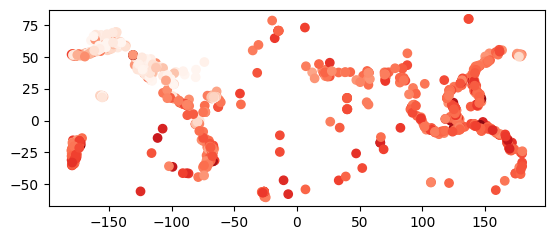

In [31]:
eq.plot('mag',cmap='Reds')
plt.savefig('eq.jpg')